In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/'

In [3]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'submission.csv')

In [4]:
print(train.shape, test.shape)

(2048, 787) (20480, 786)


In [5]:
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [6]:
train_digit = train.digit
train_letter = train.letter
train_img = np.array(train.iloc[:, 3:]).reshape(-1, 28, 28, 1)

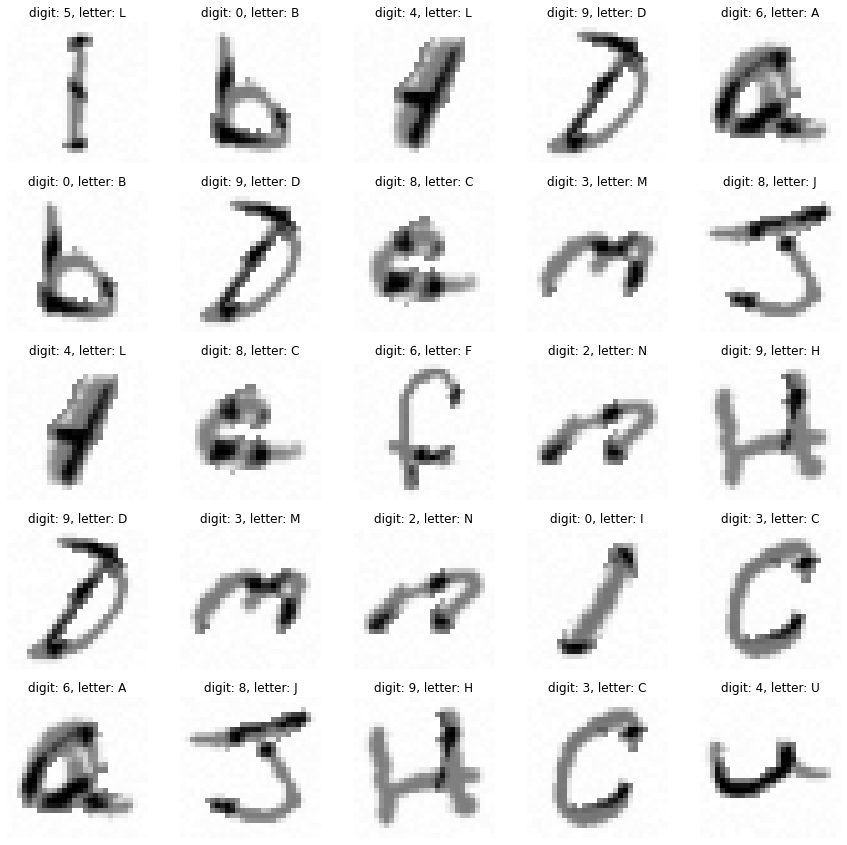

In [7]:
fig, ax = plt.subplots(5, 5)
fig.set_size_inches(15, 15)

for r in range(5):
    for c in range(5):
        ax[r, c].imshow(train_img[(r+1)*(c+1) - 1], cmap = plt.cm.binary)
        ax[r, c].set_title(f'digit: {train_digit[(r+1)*(c+1) - 1]}, letter: {train_letter[(r+1)*(c+1) - 1]}')
        ax[r, c].axis('off')

plt.show()

In [8]:
# 참고
img = train.query("letter == 'A'")
img

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
17,18,7,A,2,3,0,4,0,0,1,...,1,2,0,0,1,0,2,2,1,4
44,45,5,A,2,0,4,2,3,1,3,...,3,1,2,0,4,2,3,4,1,1
75,76,7,A,1,0,4,1,4,1,1,...,0,4,0,4,3,2,4,1,2,2
105,106,2,A,4,2,4,1,0,4,3,...,0,2,0,2,4,3,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1965,1,A,3,2,0,3,0,2,1,...,3,4,3,1,4,4,1,2,3,2
1967,1968,5,A,0,2,0,0,3,1,3,...,1,1,2,2,3,0,3,1,4,2
2010,2011,9,A,3,1,1,1,0,1,4,...,1,0,3,0,4,3,1,0,2,3
2011,2012,9,A,4,3,3,0,3,0,2,...,4,2,0,1,3,3,4,0,1,3


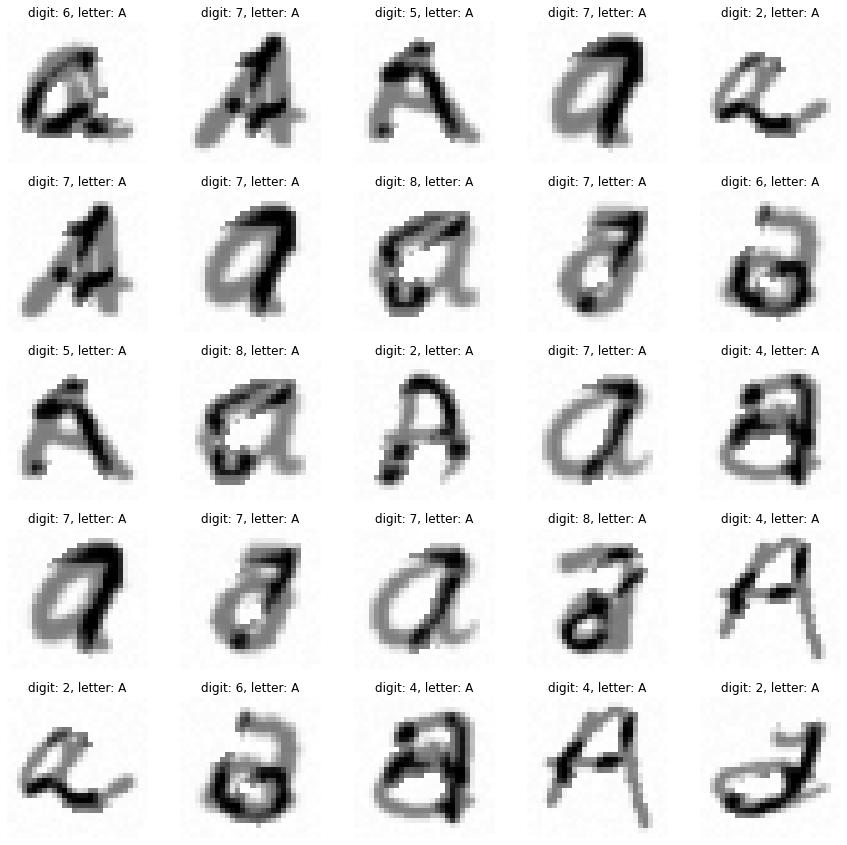

In [12]:
# A인것만 출력해보기
data_A = train[train['letter'] == 'A']
img_A = np.array(train[train['letter'] == 'A'].iloc[:, 3:]).reshape(-1, 28, 28, 1)

fig, ax = plt.subplots(5, 5)
fig.set_size_inches(15, 15)

for r in range(5):
    for c in range(5):
        ax[r, c].imshow(img_A[(r+1)*(c+1) - 1], cmap = plt.cm.binary)
        ax[r, c].set_title('digit: {}, letter: {}'.format(data_A['digit'].values[(r+1)*(c+1) - 1], data_A['letter'].values[(r+1)*(c+1) - 1]))
        ax[r, c].axis('off')

plt.show()

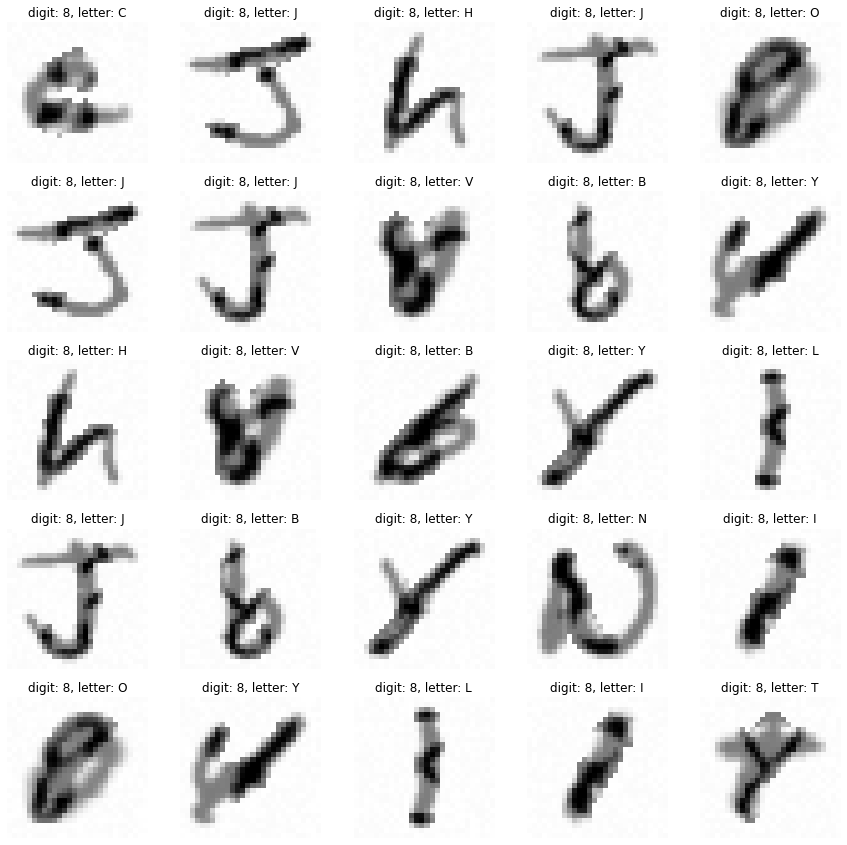

In [13]:
# 8인것만 출력해보기
data_8 = train[train['digit'] == 8]
img_8 = np.array(train[train['digit'] == 8].iloc[:, 3:]).reshape(-1, 28, 28, 1)

fig, ax = plt.subplots(5, 5)
fig.set_size_inches(15, 15)

for r in range(5):
    for c in range(5):
        ax[r, c].imshow(img_8[(r+1)*(c+1) - 1], cmap = plt.cm.binary)
        ax[r, c].set_title('digit: {}, letter: {}'.format(data_8['digit'].values[(r+1)*(c+1) - 1], data_8['letter'].values[(r+1)*(c+1) - 1]))
        ax[r, c].axis('off')

plt.show()

TypeError: Invalid shape (2048, 28, 28, 1) for image data

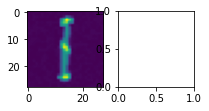

In [32]:
fig, ax = plt.subplots(1, 2)

fig.set_size_inches(3, 6)
ax[0].imshow(train_img[0])
ax[1].imshow(np.where(train_img > 150, train_img, 0))